<a href="https://colab.research.google.com/github/SophieShin/MachineLearning/blob/main/LogisticRegression(Cancer_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Logistic Regression for Classification
# Regression이라는 말이 있지만 사실은 Classification 해결하는데 쓰임

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify = cancer.target, random_state = 5)


# train_test_split()함수는 기본적으로 테스트 세트를 25%로 나눔 (훈련 세트는 75%)
# 그러나 테스트 세트의 갯수가 훈련 세트에 비해 터무니 없이 작을 때 샘플링 편향이 발생할 수 있음
# 그것을 방지하기 위해 train_test_split()함수 내에 stratify 매개변수에 타깃 데이터를 전달하면
# 클래스 비율에 맞게 데이터를 나누게 됨

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter= 5000).fit(X_train, y_train)

In [5]:
print('Accuracy of Training: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Test : {:.3f}'.format(logreg.score(X_test,y_test)))

# 둘다 정확도가 비슷하나 테스트 성능이 더 좋은 것으로 미루어 볼때
# 약간의 과소적합(underfitting)이 예상. 모델의 regularization을 더 풀어주어 보기
# regularization parameter C, 높을수록 제약을 덜 가함, 낮을수록 제약이 강함
# default 값은 1

Accuracy of Training: 0.960
Accuracy of Test : 0.965


In [6]:
logreg100 = LogisticRegression(C=100, max_iter = 50000).fit(X_train, y_train)

print('Accuracy of Training: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Accuracy of Test : {:.3f}'.format(logreg100.score(X_test,y_test)))

# 규제를 덜 하니(C값을 높이니) train/test 성능이 모두 좋아짐

Accuracy of Training: 0.981
Accuracy of Test : 0.972


In [7]:
logreg001 = LogisticRegression(C=0.01, max_iter = 50000).fit(X_train, y_train)

print('Accuracy of Training: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Accuracy of Test : {:.3f}'.format(logreg001.score(X_test,y_test)))

# 규제 심하니 정확도가 오히려 낮아짐
# logreg100모델이 성능이 더 우수

Accuracy of Training: 0.953
Accuracy of Test : 0.951


In [8]:
# 아래 x축에 사용(row * feature)
cancer.data.shape

(569, 30)

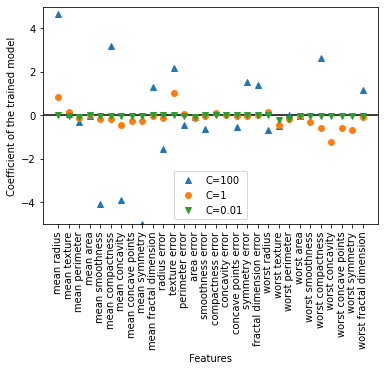

In [9]:
# L2규제(default로 많이 사용. L1규제는 세게하면 coef들이 0으로 가버려서)

import matplotlib.pyplot as plt

plt.plot(logreg100.coef_.T, '^', label = 'C=100')   # coef_ : 계수값; ndarray of shape (1, n_features) or (n_classes, n_features)
plt.plot(logreg.coef_.T, 'o', label = 'C=1')   # coef_.T : coef_의 Transpose
plt.plot(logreg001.coef_.T, 'v', label = 'C=0.01')

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)

plt.ylabel('Coefficient of the trained model')
plt.xlabel('Features')

plt.legend()

# plt.xlim([0, 5])      # X축의 범위: [xmin, xmax]
# plt.axis([0, 5, 0, 20])  # X, Y축의 범위: [xmin, xmax, ymin, ymax]

# axhline(): 축을 따라 수평선을 표시합니다
# axvline(): 축을 따라 수직선을 표시합니다.
# hlines(): 지정한 점을 따라 수평선을 표시합니다.
# vlines(): 지정한 점을 따라 수직선을 표시합니다.



# C값이 크면 규제가 덜 들어감. 계수값이 커짐
# C값이 작으면 규제가 많이 들어감. 계수값이 작아짐


In [10]:
xlims

(-1.4500000000000002, 30.45)

C=0.010인 로지스틱 회귀의 훈련 정확도 : 0.92
C=0.010인 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000인 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000인 로지스틱 회귀의 테스트 정확도 : 0.97
C=100.000인 로지스틱 회귀의 훈련 정확도 : 0.98
C=100.000인 로지스틱 회귀의 테스트 정확도 : 0.97


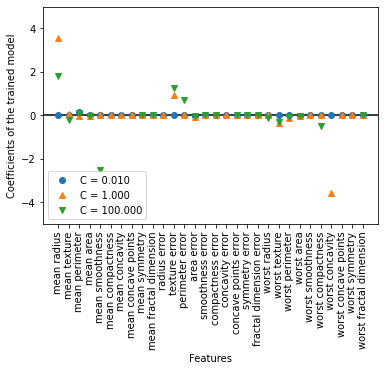

In [16]:
# L1규제(중요한 feature만 고르기 위해 씀)

for C, marker in zip([0.01, 1, 100], ['o', '^', 'v']) : 
  lr_l1 = LogisticRegression(solver = 'liblinear', C=C, penalty = 'l1', max_iter = 1000).fit(X_train, y_train)
  print('C={:.3f}인 로지스틱 회귀의 훈련 정확도 : {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
  print('C={:.3f}인 로지스틱 회귀의 테스트 정확도 : {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label = 'C = {:.3f}'.format(C))
  

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel('Features')
plt.ylabel('Coefficients of the trained model')

plt.ylim(-5,5)
plt.legend(loc= 3)